# Manual Image Labeling

We use this code to manually label all the images with regard to the angle in which they appear. These can be **frontal**, **side** or **superior**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mat73
from PIL import Image
import cv2
import os
import ipywidgets as widgets

Auxiliar function to plot the MRI scan.

In [2]:
def show_mri(file_number):
    
    ### Choose any number from 1 to 3046    
    file = f'../data/brain-tumor-data-public/{file_number}.mat'

    #https://stackoverflow.com/questions/17316880/reading-v-7-3-mat-file-in-python
    data_dict = mat73.loadmat(file)

    ### Image preprocessing
    imx = data_dict['cjdata']['image']
    imx = imx/imx.max() #Values are not normalized
    imx = imx*255 #Scale from 0 to 255
    imx = np.round(imx) 
    imx = imx.astype(np.uint8) #np datatype for images

    im = Image.fromarray(imx)

    ### Image
    fig, ax = plt.subplots()
    ax.imshow(im)
    plt.axis('off');    

We will store our progress in the _mri_angle.txt_ file in order to avoid doing everything in one sitting or by one person.
If it already exists, then some progress has been made, so we will read it and continue our work from there.

In [3]:
### This was only run when the mri_angle.txt was initialized
### Thus, if the file already exists we only read it

if 'mri_angle.txt' not in os.listdir():

    # Initialize with all None values
    mri_angle = {file_number: None for file_number in range(1,3047)}

    # Save this file
    with open('mri_angle.txt', 'w') as f:
        f.write(str(mri_angle))

else:
    # Retrieve the presaved file
    with open('mri_angle.txt', 'r') as f:
        mri_angle = f.read()
        mri_angle = eval(mri_angle)
    
# Get indices of images yet to be classified
unclassified_images = [key for key, value in mri_angle.items() if value is None]

# Initialize an auxiliar index
idx = 0

### Instructions

**1) Run the cell.**

    The cell shows the MRI scan alongside 3 checkboxes with the labels "frontal", "side" and "superior".    
    
**2) Select the box that corresponds to the angle.**

    By doing this, that label will be assigned to the mri_angle dictionary in the respective indexof the image.
   
**3) Repeat step 1 and 2.**

    It is not necessary to run the next cell; that one can be run once the user decides to stop labeling.

 ======== Image  97 =========


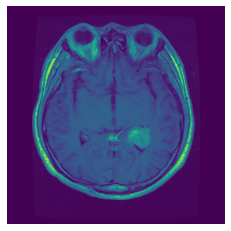

Output()

In [63]:
# https://stackoverflow.com/questions/57219796/ipywidgets-dynamic-creation-of-checkboxes-and-selection-of-data

if mri_angle[unclassified_images[idx]] is None:    

    data = {"frontal":"frontal", "side":"side", "superior":"superior"}

    names = []
    checkbox_objects = []
    for key in data:
        checkbox_objects.append(widgets.Checkbox(value=False, description=key))
        names.append(key)

    arg_dict = {names[i]: checkbox for i, checkbox in enumerate(checkbox_objects)}

    ui = widgets.VBox(children=checkbox_objects)
    
    selected_data = []
    def select_data(**kwargs):        

        for key in kwargs:
            if kwargs[key] is True:
                mri_angle[unclassified_images[idx-1]] = key
        
        
    show_mri(unclassified_images[idx])    
    print(" ======== Image ",str(unclassified_images[idx]), "=========")

    out = widgets.interactive_output(select_data, arg_dict)
    display(ui, out)
    
else:
    show_mri(unclassified_images[idx])    
    print(" ======== Image ",str(unclassified_images[idx]), "=========")
    print(f" This image has already been classified as {mri_angle[unclassified_images[idx]]}")

idx += 1

When we want to save our progress, we run the following line.

In [64]:
with open('mri_angle.txt', 'w') as f:
    f.write(str(mri_angle))

The following cells are added to avoid the auto-scrolling function to trigger when we run the labeling cell.